# 1. Import and Install Dependencies

In [1]:
%pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

In [2]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
draw_landmarks(frame, results)
print(results.face_landmarks)

landmark {
  x: 0.6196797490119934
  y: 0.5007267594337463
  z: -0.03228464350104332
}
landmark {
  x: 0.6222877502441406
  y: 0.45216789841651917
  z: -0.04734044149518013
}
landmark {
  x: 0.6135977506637573
  y: 0.471466064453125
  z: -0.02739974670112133
}
landmark {
  x: 0.6023734211921692
  y: 0.4148230254650116
  z: -0.036198049783706665
}
landmark {
  x: 0.6216777563095093
  y: 0.43841758370399475
  z: -0.049271490424871445
}
landmark {
  x: 0.6163889169692993
  y: 0.423196405172348
  z: -0.04394005239009857
}
landmark {
  x: 0.5999825596809387
  y: 0.3873957395553589
  z: -0.015559736639261246
}
landmark {
  x: 0.5126850605010986
  y: 0.39931368827819824
  z: -0.01626203954219818
}
landmark {
  x: 0.5932029485702515
  y: 0.35480988025665283
  z: -0.006314907688647509
}
landmark {
  x: 0.5921090245246887
  y: 0.335717111825943
  z: -0.0061625768430531025
}
landmark {
  x: 0.5798734426498413
  y: 0.2698582410812378
  z: 0.010757571086287498
}
landmark {
  x: 0.6202266216278076
 

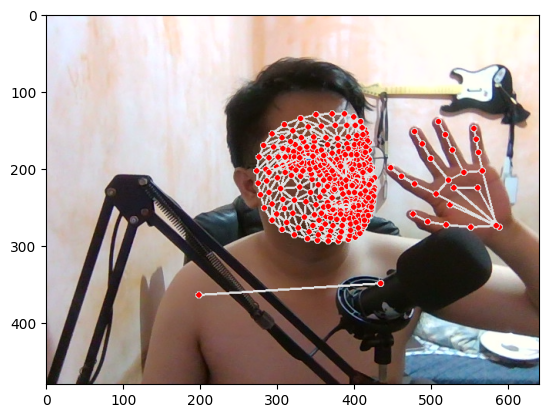

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [ ]:
len(results.left_hand_landmarks.landmark)
print(results.pose_landmarks)

landmark {
  x: 0.6088429689407349
  y: 0.4497580826282501
  z: -0.7223212122917175
  visibility: 0.9999186396598816
}
landmark {
  x: 0.6075899600982666
  y: 0.37947478890419006
  z: -0.6214793920516968
  visibility: 0.9998474717140198
}
landmark {
  x: 0.6192010641098022
  y: 0.3794005811214447
  z: -0.6214110851287842
  visibility: 0.999832808971405
}
landmark {
  x: 0.6304313540458679
  y: 0.3791793882846832
  z: -0.6210936307907104
  visibility: 0.9998070001602173
}
landmark {
  x: 0.5630857944488525
  y: 0.3816705644130707
  z: -0.7056940793991089
  visibility: 0.9999070167541504
}
landmark {
  x: 0.5410483479499817
  y: 0.38413679599761963
  z: -0.7058295011520386
  visibility: 0.9999203681945801
}
landmark {
  x: 0.5154520869255066
  y: 0.3876298666000366
  z: -0.7064281702041626
  visibility: 0.9999099373817444
}
landmark {
  x: 0.5977520942687988
  y: 0.41180455684661865
  z: -0.12539860606193542
  visibility: 0.9997766017913818
}
landmark {
  x: 0.4526331424713135
  y: 0.427

In [ ]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [ ]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [25]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [ ]:
result_test = extract_keypoints(results)
print(result_test)

[ 0.60884297  0.44975808 -0.72232121 ...  0.          0.
  0.        ]


In [ ]:
print(result_test)

[ 0.60884297  0.44975808 -0.72232121 ...  0.          0.
  0.        ]


In [ ]:
np.save('0', result_test)

In [ ]:
np.load('../Data//hello//10//0.npy')

array([ 0.46685702,  0.44218826, -0.52233195, ...,  0.12307863,
        0.15609404, -0.02438687])

# 4. Setup Folders for Collection

In [ ]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('../Data') 



# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 1

In [9]:
# Actions that we try to detect
# actions = np.array([ 'hello', 'idle'])
actions = np.array([
    'hello', 'thanks', 'iloveyou', 'idle',
    'A', 'B', 'C', 'D', 'E',
    'F', 'G', 'H', 'I', 'J',
    'K', 'L', 'M', 'N', 'O',
    'P', 'Q', 'R', 'S', 'T',
    'U', 'V', 'W', 'X', 'Y',
    'Z',
    ])

print(len(actions))

30


In [ ]:
for action in actions: 
    action_path = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_path):
        os.makedirs(action_path)
    dirmax = np.max([0] + [int(d) for d in os.listdir(action_path) if os.path.isdir(os.path.join(action_path, d))])
    for sequence in range(1, no_sequences+1):
        try: 
            os.makedirs(os.path.join(action_path, str(dirmax+sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

# 6. Preprocess Data and Create Labels and Features

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [11]:
label_map = {label:num for num, label in enumerate(actions)}

In [12]:
label_map

{'hello': 0,
 'thanks': 1,
 'iloveyou': 2,
 'idle': 3,
 'A': 4,
 'B': 5,
 'C': 6,
 'D': 7,
 'E': 8,
 'F': 9,
 'G': 10,
 'H': 11,
 'I': 12,
 'J': 13,
 'K': 14,
 'L': 15,
 'M': 16,
 'N': 17,
 'O': 18,
 'P': 19,
 'Q': 20,
 'R': 21,
 'S': 22,
 'T': 23,
 'U': 24,
 'V': 25,
 'W': 26,
 'X': 27,
 'Y': 28,
 'Z': 29}

In [ ]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [ ]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,

In [ ]:
np.array(sequences).shape

(900, 30, 1662)

In [ ]:
np.array(labels).shape

(900,)

In [ ]:
X = np.array(sequences)

In [ ]:
X.shape

(900, 30, 1662)

In [ ]:
y = to_categorical(labels).astype(int)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, stratify=y) 

#increase test size to round off test per gesture (28.5/1.5 = 27/3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y) 

In [ ]:
y_test.shape

(45, 30)

# 7. Build and Train LSTM Neural Network

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from keras.layers import BatchNormalization

In [14]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [15]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

c:\Users\zimmer\anaconda3\envs\deepsign\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(BatchNormalization())

model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(BatchNormalization())
model.add(LSTM(64, return_sequences=False, activation='relu')) 

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization()) 
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization()) 

model.add(Dense(actions.shape[0], activation='softmax'))

In [16]:
from keras.layers import Conv1D

model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(30, 1662)))
model.add(BatchNormalization())

model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(BatchNormalization()) 

model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(BatchNormalization())

model.add(LSTM(64, return_sequences=False, activation='relu')) 

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization()) 

model.add(Dense(32, activation='relu'))

model.add(Dense(actions.shape[0], activation='softmax')) 

c:\Users\zimmer\anaconda3\envs\deepsign\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [17]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - categorical_accuracy: 0.0456 - loss: 3.6176
Epoch 2/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - categorical_accuracy: 0.1495 - loss: 3.1124
Epoch 3/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - categorical_accuracy: 0.2147 - loss: 2.9037
Epoch 4/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - categorical_accuracy: 0.2295 - loss: 2.6393
Epoch 5/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - categorical_accuracy: 0.3568 - loss: 2.2734
Epoch 6/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - categorical_accuracy: 0.3736 - loss: 2.1366
Epoch 7/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - categorical_accuracy: 0.4357 - loss: 1.9048
Epoch 8/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - categorical_accuracy: 0.5332 - loss: 1.5927
Epoch 9/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - categorical_accuracy: 0.5553 - loss: 1.5110
Epoch 10/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - categorical_accuracy: 0.6206 - loss: 1.3186
Epoch 11/

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 32)         │       159,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 28, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 28, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 30)             │           990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,021,916 (3.90 MB)

 Trainable params: 340,446 (1.30 MB)

 Non-trainable params: 576 (2.25 KB)

 Optimizer params: 680,894 (2.60 MB)

# 8. Make Predictions

In [ ]:
res = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


In [ ]:
actions[np.argmax(res[2])]

'hello'

In [ ]:
actions[np.argmax(y_test[1])]

'S'

# 9. Save Weights

In [ ]:
model.save('../models/deepsign_chan-v3.3.keras')

In [ ]:
del model

In [19]:
model.load_weights('../models/deepsign_chan-v3.3.keras')

c:\Users\zimmer\anaconda3\envs\deepsign\lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 52 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


# 10. Evaluation using Confusion Matrix and Accuracy

In [20]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [21]:
yhat = model.predict(X_test)

NameError: name 'X_test' is not defined

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[43,  0],
        [ 0,  2]],

       [[44,  0],
        [ 0,  1]],

       [[43,  0],
        [ 0,  2]],

       [[43,  0],
        [ 0,  2]],

       [[43,  0],
        [ 1,  1]],

       [[43,  0],
        [ 1,  1]],

       [[44,  0],
        [ 0,  1]],

       [[44,  0],
        [ 1,  0]],

       [[41,  2],
        [ 2,  0]],

       [[43,  0],
        [ 0,  2]],

       [[43,  0],
        [ 0,  2]],

       [[44,  0],
        [ 1,  0]],

       [[37,  7],
        [ 0,  1]],

       [[43,  0],
        [ 2,  0]],

       [[43,  0],
        [ 2,  0]],

       [[44,  0],
        [ 0,  1]],

       [[40,  3],
        [ 0,  2]],

       [[44,  0],
        [ 1,  0]],

       [[43,  1],
        [ 0,  1]],

       [[43,  0],
        [ 2,  0]],

       [[41,  3],
        [ 0,  1]],

       [[44,  0],
        [ 1,  0]],

       [[44,  0],
        [ 1,  0]],

       [[44,  0],
        [ 1,  0]],

       [[44,  0],
        [ 1,  0]],

       [[44,  0],
        [ 1,  0]],

       [[42,

In [ ]:
accuracy_score(ytrue, yhat)

0.5555555555555556

# 11. Test in Real Time

In [ ]:
from scipy import stats

In [22]:
# colors = [(245,117,16), (117,245,16)]
colors = [
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), 
    ]

In [23]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, 
              (0, 60 + num * 40), 
              (int(np.round(prob * 900)), 90 + num * 40), # Use np.round
              colors[num], -1) 
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [29]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # print(predictions)
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        # print(image)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            print(predictions[-10:], np.unique(predictions[-10:]))
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                print(actions[np.argmax(res)], res[np.argmax(res)])
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                           
                    else:
                        sentence.append(actions[np.argmax(res)])
                        print(sentence)

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[3] [3]
idle 0.7650447
['idle']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[3, 3] [3]
idle 0.7316778
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[3, 3, 3] [3]
idle 0.69488764
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[3, 3, 3, 3] [3]
idle 0.7342467
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[3, 3, 3, 3, 3] [3]
idle 0.77572155
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[3, 3, 3, 3, 3, 3] [3]
idle 0.9150231
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[3, 3, 3, 3, 3, 3, 3] [3]
idle 0.97290707
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[3, 3, 3, 3, 3, 3, 3, 3] [3]
idle 0.93638754
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[3, 3, 3, 3, 3, 3, 3, 3, 3] [3]
idle 0.9430239
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3] [3]
idle 0.9740864
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3] [3]
idle 0.8647615
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3] [3]
idle 0.8465221
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[3, 3, 3, 3, 3, 3, 3, 3, 3, 

KeyboardInterrupt: 